In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [ ]:
df1=pd.read_csv('/content/data9.txt',header=None,)
df2=pd.read_csv('/content/data89.txt',header=None,)
df3=pd.read_csv('/content/data88.txt',header=None,)
df4=pd.read_csv('/content/data112.txt',header=None,)
df5=pd.read_csv('/content/data109.txt',header=None,)
dataset= pd.concat([df1, df2,df3,df4,df5])
dataset=dataset.fillna(0)
dataset=dataset.T
dataset.columns=[1,2,3,4,5]
dataset

,1,2,3,4,5
0,0.0,0.0,0.0,120.0,0.0
1,128.0,0.0,0.0,0.0,0.0
2,248.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,120.0,0.0
4,0.0,0.0,0.0,0.0,128.0
...,...,...,...,...,...
9996,248.0,0.0,0.0,248.0,0.0
9997,128.0,120.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0
9999,248.0,0.0,0.0,0.0,0.0


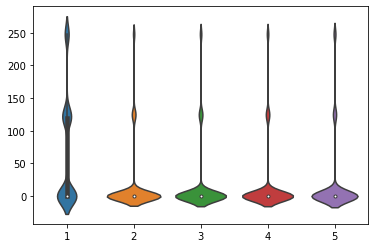

In [ ]:
sns.violinplot(data=dataset)

In [ ]:
model =  IsolationForest(contamination = 0.1)
model=model.fit(dataset)
# add the data to the main  
dataset['isolation'] = pd.Series(model.predict(dataset))
dataset['isolation'] = dataset['isolation'].map( {1: 0, -1: 1} )
print(dataset['isolation'].value_counts())

0    9008
1     993
Name: isolation, dtype: int64


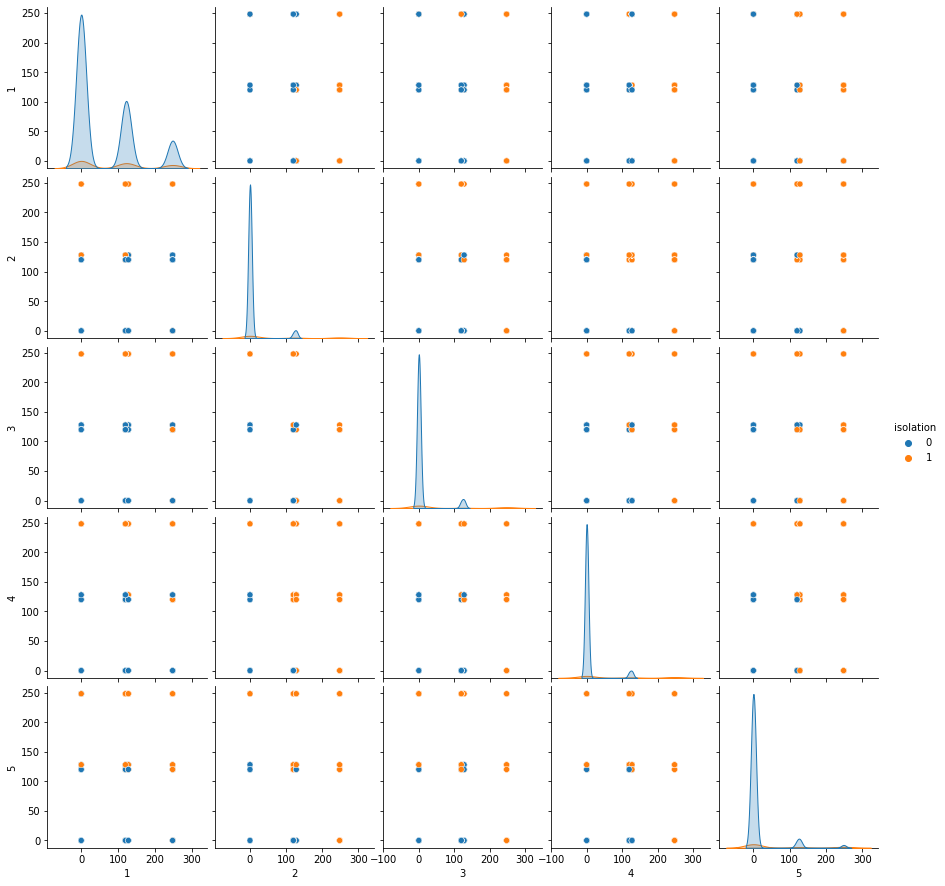

In [ ]:
sns.pairplot(hue='isolation',data=dataset[[1,2,3,4,5,'isolation']])

OneClassSVM is a type of algorithm used for anomaly detection. It is an unsupervised machine learning technique that uses support vector machines (SVMs) to identify observations that are different from the majority of the data.

The algorithm works by training an SVM model on the data, with the objective of separating the data from an artificial, origin point.

It then uses this model to classify new data points as either inliers or outliers based on their distance from the origin point.

In [ ]:

from sklearn.svm import OneClassSVM

# Create model
model = OneClassSVM(kernel='rbf', nu=0.1)
model.fit(dataset[[1,2,3,4]])

# Use the model to predict on new data
dataset['oneclass']= model.predict(dataset[[1,2,3,4]])

dataset['oneclass'] = dataset['oneclass'].map( {1: 0, -1: 1} )
print(dataset['oneclass'].value_counts())

1    7374
0    2627
Name: oneclass, dtype: int64


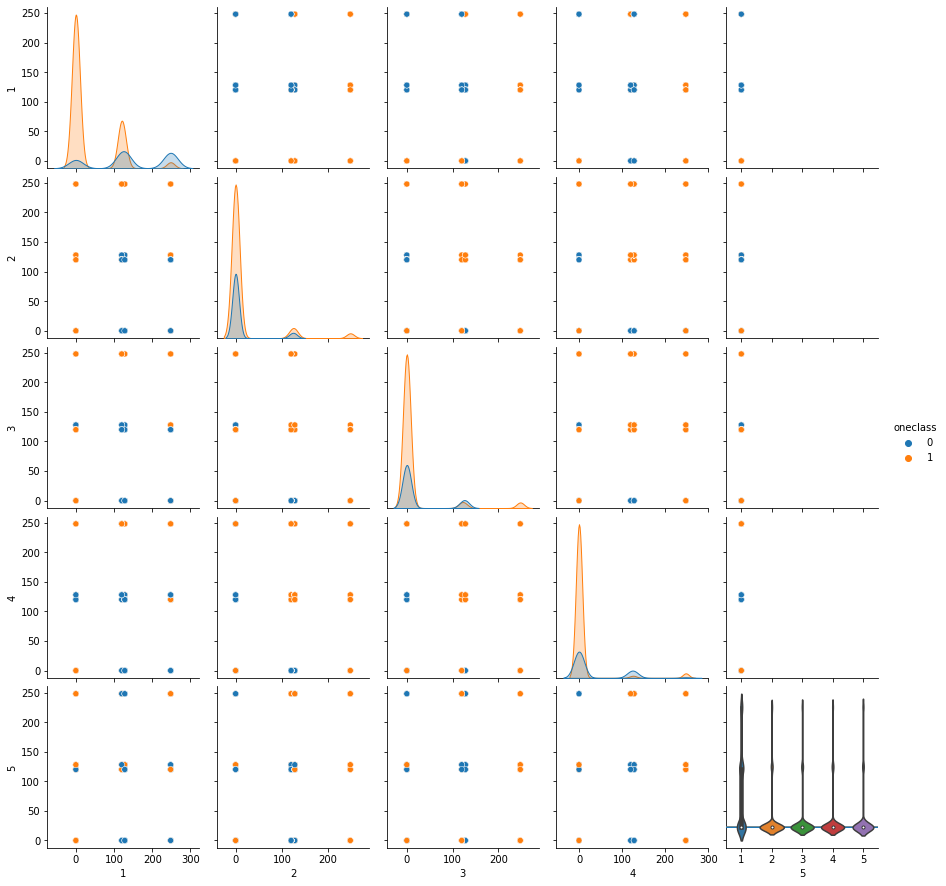

In [ ]:
sns.pairplot(hue='oneclass',data=dataset[[1,2,3,4,5,'oneclass']])

In [ ]:
dataset['isolation'].value_counts()

0    9026
1     975
Name: isolation, dtype: int64

*Local Outlier Factor (LOF) is an algorithm used for outlier detection in unsupervised learning. It calculates the local density of an observation by comparing the density of an observation to the densities of its neighboring observations. Observations that have a lower density than their neighbors are considered outliers. The algorithm uses k-neighbors to define the local density of the data points, and calculates the LOF score for each point, the higher the score, the more abnormal the point is. The algorithm returns the outlier score for each data point, which can be used to identify the outliers in the data.italicized text*

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Create an instance of the model
model = LocalOutlierFactor(n_neighbors=30, contamination=0.1)

# Fit the model to the data
model.fit(dataset.iloc[:,:5])

# Use the model to predict on new data
# predictions = model.fit_predict(X)
dataset['local']= model.fit_predict(dataset.iloc[:,:5])

dataset['local'] = dataset['local'].map( {1: 0, -1: 1} )
print(dataset['local'].value_counts())

0    9309
1     692
Name: local, dtype: int64


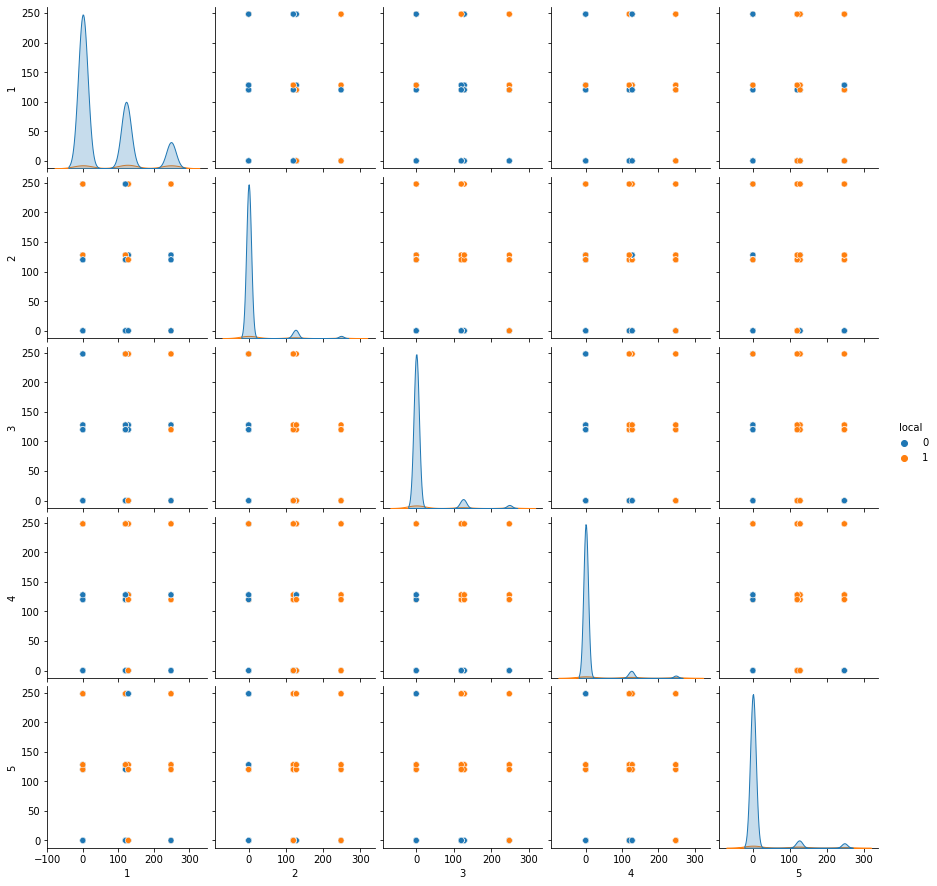

In [ ]:
sns.pairplot(hue='local',data=dataset[[1,2,3,4,5,'local']])

In [ ]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=4, random_state=0)


model.fit(dataset.iloc[:,:5])

dataset['kmeans']= model.fit_predict(dataset.iloc[:,:5])

dataset['kmeans'] = dataset['kmeans'].map( {1: 0, -1: 1} )
print(dataset['kmeans'].value_counts())


0.0    5983
Name: kmeans, dtype: int64


kmeans algo is nor defined other outlinear group bez they are more disrtance to each other


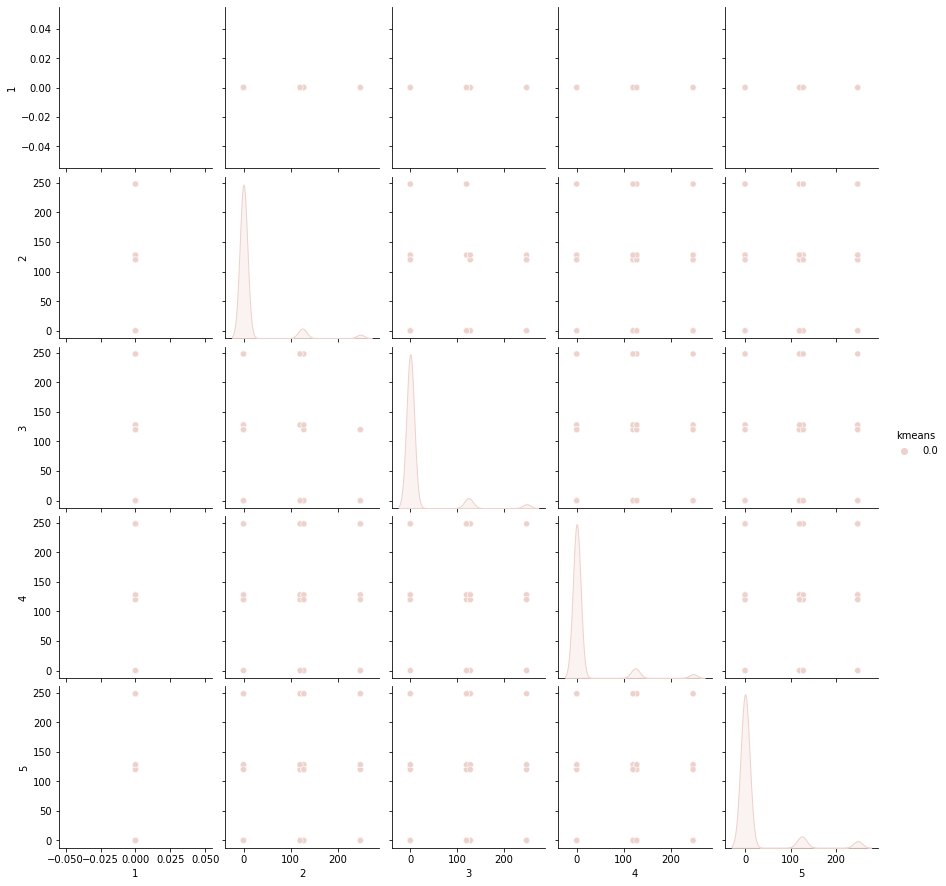

In [ ]:
sns.pairplot(hue='kmeans',data=dataset[[1,2,3,4,5,'kmeans']])

In [ ]:
# sns.pairplot(dataset.iloc[:5],hue='scores')

In [ ]:
# sns.pairplot(dataset.iloc[:5],hue='oneclass')
